# Here are all the notebooks we will use in this notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import joblib
from sklearn.preprocessing import StandardScaler

# loading the data

In [13]:
data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\data.csv",index_col="date", parse_dates=True)
train_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\train_data.csv", index_col="date", parse_dates=True)
test_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\test_data.csv", index_col="date", parse_dates=True)

Scaling the data and predicting each feature using a single lag, while saving the scalers and models for each feature. Later, we will build a pipeline that loads these models without training and scalers to make future predictions.

In [15]:
# Initialize the scaler
scaler = MinMaxScaler()

# Define the create_lagged_features function
def create_lagged_features(data, lag):
    """
    Create lagged features for time series data.
    Args:
        data (numpy.ndarray): The input data.
        lag (int): The number of lagged features to create.
    Returns:
        tuple: A tuple containing the lagged features (X) and the target values (y).
    """
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define the lag variable
lag = 1

# List of features to iterate over
features = [
    "temp2_max(c)", "temp2_min(c)", "temp2_ave(c)", 
    "suface_pressure(pa)", "wind_speed50_max(m/s)", "wind_speed50_min(m/s)", 
    "wind_speed50_ave(m/s)", "prectotcorr","total_demand(mw)"
]

# Dictionary to store predictions and RMSE for each feature
results = {}

# Loop through each feature
for feature in features:
    print(f"Processing feature: {feature}")
    
    # Scale the data for the current feature
    scaled_data = scaler.fit_transform(train_data[[feature]].values)
    
    # Save the fitted scaler to a file
    joblib.dump(scaler, f"{feature.replace('/', '')}_scaler.pkl")

    # Create lagged features
    X_train, y_train = create_lagged_features(scaled_data, lag)
    
    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    
    # Define the LSTM model
    model = Sequential([
        # Première couche LSTM avec plus de neurones et activation tanh (par défaut)
        LSTM(100, activation='tanh', input_shape=(lag, 1), return_sequences=True),
        
        # Dropout pour éviter le sur-apprentissage
        Dropout(0.2),
        
        # Deuxième couche LSTM pour capturer davantage de séquences
        LSTM(50, activation='tanh'),
        
        # Couche Dense pour la prédiction finale
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)
    
    # Save the model with the feature name
    model.save(f"{feature}_LSTM.h5")
    
    # Prepare test data
    scaled_test_data = scaler.transform(test_data[[feature]].values)
    X_test, y_test = create_lagged_features(scaled_test_data, lag)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data[[feature]].iloc[lag:-1], predictions[1:]))
    results[feature] = {"predictions": predictions, "rmse": rmse}
    print(f"Feature: {feature}, RMSE: {rmse}")

Processing feature: temp2_max(c)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: temp2_max(c), RMSE: 0.34078812105579576
Processing feature: temp2_min(c)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: temp2_min(c), RMSE: 0.27497234097015444
Processing feature: temp2_ave(c)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: temp2_ave(c), RMSE: 0.25101191646473336
Processing feature: suface_pressure(pa)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: suface_pressure(pa), RMSE: 0.03315444140058655
Processing feature: wind_speed50_max(m/s)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: wind_speed50_max(m/s), RMSE: 0.6521111262028205
Processing feature: wind_speed50_min(m/s)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: wind_speed50_min(m/s), RMSE: 0.645817900032305
Processing feature: wind_speed50_ave(m/s)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: wind_speed50_ave(m/s), RMSE: 0.5565387297945966
Processing feature: prectotcorr


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Feature: prectotcorr, RMSE: 6.343224715109575
Processing feature: total_demand(mw)


c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Feature: total_demand(mw), RMSE: 156.84912012623786


# plotting the results

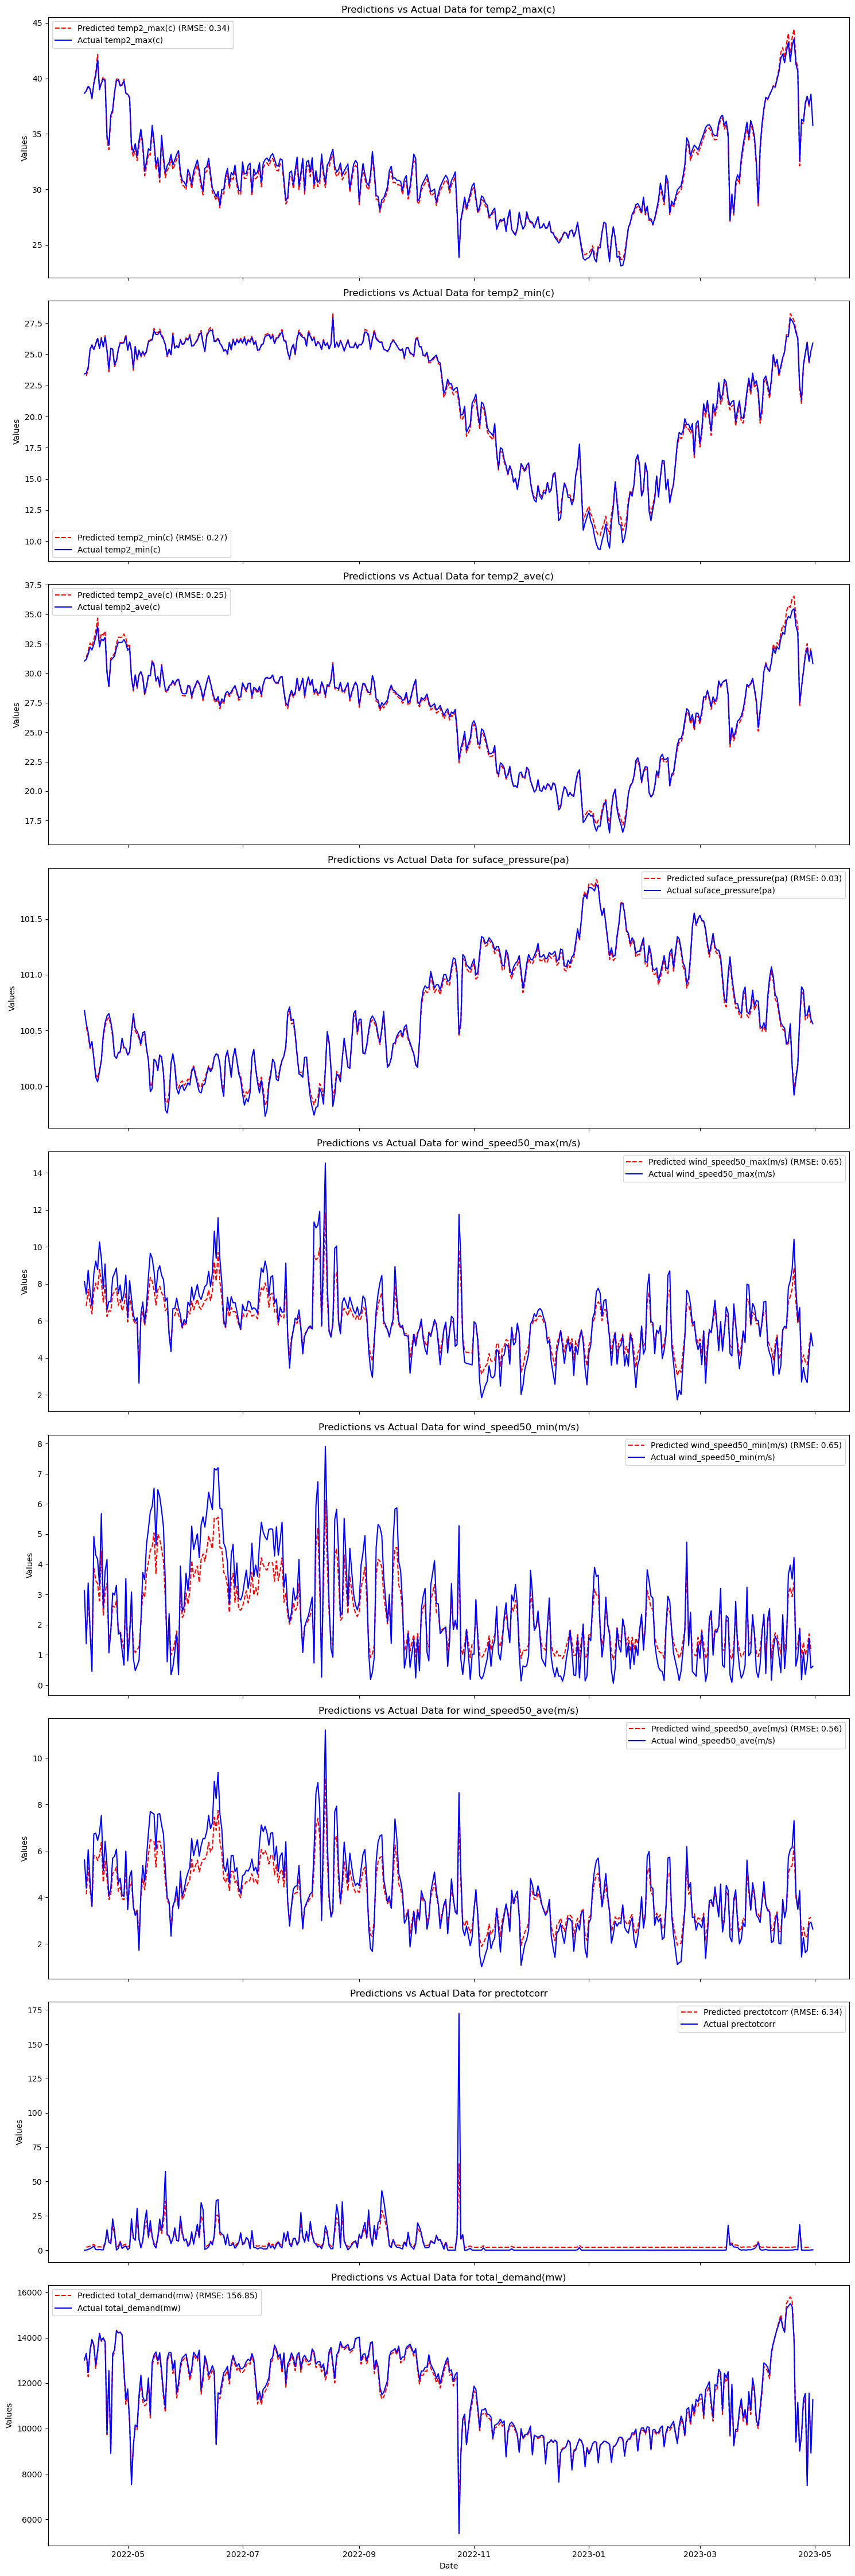

In [16]:
# Plot the predictions for each feature in subplots
fig, axes = plt.subplots(len(features), 1, figsize=(15, 5 * len(features)), sharex=True)

for i, feature in enumerate(features):
    ax = axes[i]
    ax.plot(test_data.index[lag:-1], results[feature]["predictions"][1:], label=f"Predicted {feature} (RMSE: {results[feature]['rmse']:.2f})", color='red', linestyle='--')
    ax.plot(test_data.index, test_data[feature], label=f"Actual {feature}", color='blue')
    ax.set_title(f"Predictions vs Actual Data for {feature}")
    ax.set_ylabel("Values")
    ax.legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()